# HT 7. SVM

## Miembros
- Fabian Estuardo Juarez Tello 21440
- Diego Estuardo Lemus Lopez 21469

## Link al repositorio
El repositorio puede ser visualizado [acá](https://github.com/FabianJuarez182/MD-HT7.git)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.svm import SVC
from sklearn.exceptions import FitFailedWarning

## Análisis exploratorio de los datos

In [21]:
datos = pd.read_csv('train.csv')
datos.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
le = LabelEncoder()
datos["MSZoning"] = le.fit_transform(datos["MSZoning"])
datos["Street"] = le.fit_transform(datos["Street"])
datos["Alley"] = le.fit_transform(datos["Alley"])
datos["LotShape"] = le.fit_transform(datos["LotShape"])
datos["LandContour"] = le.fit_transform(datos["LandContour"])
datos["Utilities"] = le.fit_transform(datos["Utilities"])
datos["LotConfig"] = le.fit_transform(datos["LotConfig"])
datos["LandSlope"] = datos["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
datos["Neighborhood"] = le.fit_transform(datos["Neighborhood"])
datos["Condition1"] = le.fit_transform(datos["Condition1"])
datos["Condition2"] = le.fit_transform(datos["Condition2"])
datos["BldgType"] = le.fit_transform(datos["BldgType"])
datos["HouseStyle"] = le.fit_transform(datos["HouseStyle"])
datos["RoofStyle"] = le.fit_transform(datos["RoofStyle"])
datos["RoofMatl"] = le.fit_transform(datos["RoofMatl"])
datos["Exterior1st"] = le.fit_transform(datos["Exterior1st"])
datos["Exterior2nd"] = le.fit_transform(datos["Exterior2nd"])
datos["MasVnrType"] = le.fit_transform(datos["MasVnrType"])

condition_map = {
    "Ex": 5, 
    "Gd": 4, 
    "TA": 3, 
    "Fa": 2, 
    "Po": 1, 
    "NA": 0,
}
datos["ExterQual"] = datos["ExterQual"].map(condition_map)
datos["ExterCond"] = datos["ExterCond"].map(condition_map)
datos["Foundation"] = le.fit_transform(datos["Foundation"])
datos["BsmtQual"] = datos["BsmtQual"].map(condition_map)
datos["BsmtCond"] = datos["BsmtCond"].map(condition_map)
datos["BsmtExposure"] = datos["BsmtExposure"].map({
    "Gd": 4, 
    "Av": 3, 
    "Mn": 2, 
    "No": 1, 
    "NA": 0
})
datos["BsmtFinType1"] = datos["BsmtFinType1"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["BsmtFinType2"] = datos["BsmtFinType2"].map({
    "GLQ": 6, 
    "ALQ": 5, 
    "BLQ": 4, 
    "Rec": 3, 
    "LwQ": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["Heating"] = le.fit_transform(datos["Heating"])
datos["HeatingQC"] = datos["HeatingQC"].map(condition_map)
datos["CentralAir"] = le.fit_transform(datos["CentralAir"])
datos["Electrical"] = datos["Electrical"].map({
    "SBrkr": 5, 
    "FuseA": 4, 
    "FuseF": 3, 
    "FuseP": 2, 
    "Mix": 1, 
    "NA": 0
})
datos["KitchenQual"] = datos["KitchenQual"].map(condition_map)
datos["Functional"] = le.fit_transform(datos["Functional"])
datos["FireplaceQu"] = datos["FireplaceQu"].map(condition_map)
datos["GarageType"] = le.fit_transform(datos["GarageType"])
datos["GarageFinish"] = datos["GarageFinish"].map({
    "Fin": 3, 
    "RFn": 2, 
    "Unf": 1, 
    "NA": 0
})
datos["GarageQual"] = datos["GarageQual"].map(condition_map)
datos["GarageCond"] = datos["GarageCond"].map(condition_map)
datos["PavedDrive"] = datos["PavedDrive"].map({
    "Y": 3, 
    "P": 2, 
    "N": 1,
    "NA": 0
})
datos["PoolQC"] = datos["PoolQC"].map(condition_map)
datos["Fence"] = datos["Fence"].map({
    "GdPrv": 4, 
    "MnPrv": 3, 
    "GdWo": 2, 
    "MnWw": 1, 
    "NA": 0
})
datos["MiscFeature"] = le.fit_transform(datos["MiscFeature"])
datos["SaleType"] = le.fit_transform(datos["SaleType"])
datos["SaleCondition"] = le.fit_transform(datos["SaleCondition"])


In [23]:
columns_with_na = datos.isna().any()
# Recorrer todas las columnas y rellenar con 0 donde sea necesario
for column in columns_with_na.index:
    if columns_with_na[column]:
        datos[column] = datos[column].fillna(0)

In [24]:
# Definir los límites de las categorías basadas en los percentiles
bins = datos['SalePrice'].quantile([0, 0.33, 0.66, 1]).values

# Crear las categorías
datos['CategoriaPrecio'] = pd.cut(datos['SalePrice'], bins, labels=['Bajo', 'Medio', 'Alto'], include_lowest=True)


In [25]:
# Crear variables dicotómicas
datos['EsCara'] = (datos['CategoriaPrecio'] == 'Alto').astype(int)
datos['EsMedia'] = (datos['CategoriaPrecio'] == 'Medio').astype(int)
datos['EsEconomica'] = (datos['CategoriaPrecio'] == 'Bajo').astype(int)

# Mostrar las primeras filas para verificar el resultado
print(datos[['CategoriaPrecio', 'EsCara', 'EsMedia', 'EsEconomica']].head())

# Codificación de la variable categórica
le = LabelEncoder()
datos['CategoriaPrecio'] = le.fit_transform(datos['CategoriaPrecio'])

# Escalado de características
scaler = StandardScaler()
X = datos.drop(['SalePrice', 'CategoriaPrecio'], axis=1)  # características
X_scaled = scaler.fit_transform(X)

y = datos['CategoriaPrecio']  # variable objetivo


  CategoriaPrecio  EsCara  EsMedia  EsEconomica
0            Alto       1        0            0
1           Medio       0        1            0
2            Alto       1        0            0
3           Medio       0        1            0
4            Alto       1        0            0


### Inciso 4

Resultados de GridSearchCV:
   param_C param_kernel param_gamma param_degree  mean_test_score
0      0.1       linear         NaN          NaN         1.000000
2       10       linear         NaN          NaN         1.000000
1        1       linear         NaN          NaN         1.000000
16     0.1         poly         0.1            3         0.989735
26       1         poly           1            3         0.989735


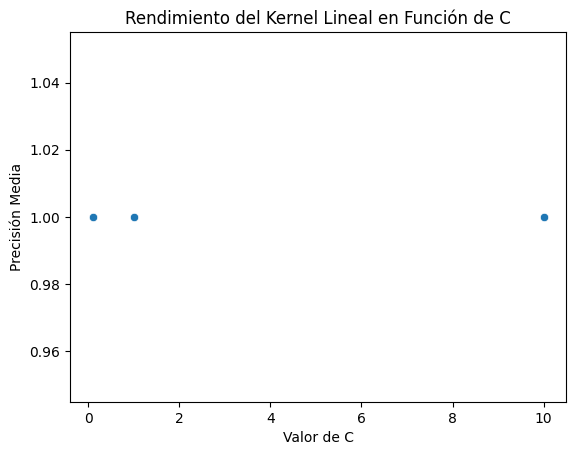

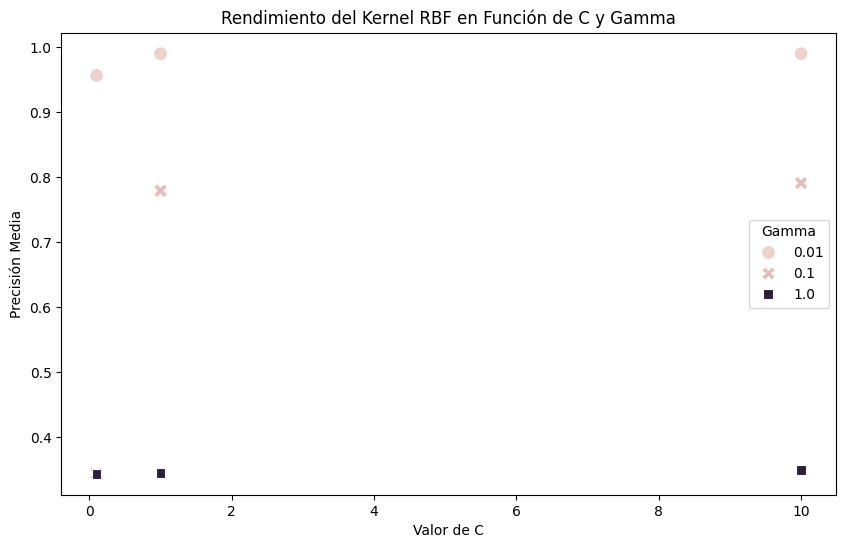

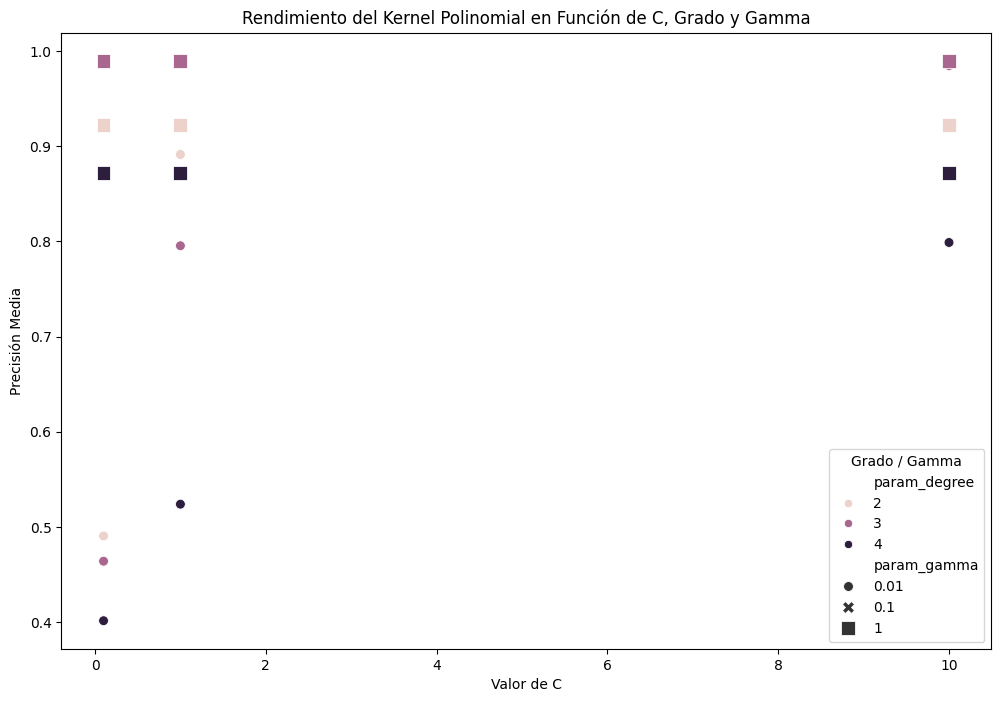

In [26]:

# División de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Configuración para GridSearchCV con múltiples kernels y parámetros
param_grid = [
    {'C': [0.1, 1, 10], 'kernel': ['linear']},
    {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'kernel': ['rbf']},
    {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1], 'degree': [2, 3, 4], 'kernel': ['poly']}
]

# Creación del modelo SVM
svc = SVC()

# Aplicación de GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el mejor estimador
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Convertir los resultados de GridSearchCV en un DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Filtrar las columnas relevantes para visualizar
results = results[['param_C', 'param_kernel', 'param_gamma', 'param_degree', 'mean_test_score']]

# Ordenar los resultados por la puntuación de prueba promedio en orden descendente
results_sorted = results.sort_values(by='mean_test_score', ascending=False)

print("Resultados de GridSearchCV:")
print(results_sorted.head())  # Mostrar las primeras filas para los mejores modelos

# Gráfico para Kernel Lineal
sns.scatterplot(data=results[results['param_kernel']=='linear'], x='param_C', y='mean_test_score')
plt.title('Rendimiento del Kernel Lineal en Función de C')
plt.xlabel('Valor de C')
plt.ylabel('Precisión Media')
plt.show()

# Gráfico para Kernel RBF
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results[results['param_kernel']=='rbf'], x='param_C', y='mean_test_score', hue='param_gamma', style='param_gamma', s=100)
plt.title('Rendimiento del Kernel RBF en Función de C y Gamma')
plt.xlabel('Valor de C')
plt.ylabel('Precisión Media')
plt.legend(title='Gamma')
plt.show()

# Gráfico para Kernel Polinomial
plt.figure(figsize=(12, 8))
sns.scatterplot(data=results[results['param_kernel']=='poly'], x='param_C', y='mean_test_score', hue='param_degree', style='param_gamma', size='param_gamma', sizes=(50, 200))
plt.title('Rendimiento del Kernel Polinomial en Función de C, Grado y Gamma')
plt.xlabel('Valor de C')
plt.ylabel('Precisión Media')
plt.legend(title='Grado / Gamma')
plt.show()

### Inciso 5 y 6

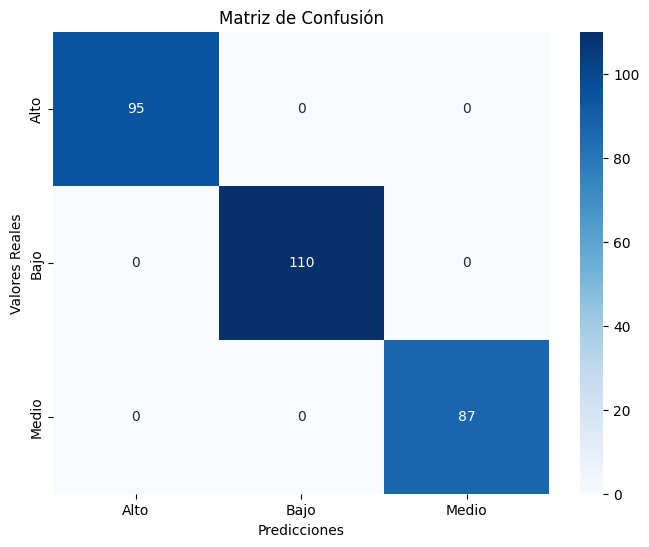

In [27]:
# Uso del mejor modelo para predecir
y_pred = best_estimator.predict(X_test)

# Generación de la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualización de la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


### Inciso 7

In [28]:
# Evaluación del modelo en el conjunto de entrenamiento
train_accuracy = best_estimator.score(X_train, y_train)

# Evaluación del modelo en el conjunto de prueba
test_accuracy = best_estimator.score(X_test, y_test)

print(f"Precisión en entrenamiento: {train_accuracy}")
print(f"Precisión en prueba: {test_accuracy}")

# Análisis de sobreajuste o desajuste basado en la diferencia de precisión
if train_accuracy > test_accuracy:
    print("Posible sobreajuste.")
elif train_accuracy < test_accuracy:
    print("Posible desajuste.")
else:
    print("El modelo está bien ajustado.")


Precisión en entrenamiento: 1.0
Precisión en prueba: 1.0
El modelo está bien ajustado.
